In [60]:
 !pip install pycaret

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pycaret

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, r2_score, mean_squared_error, f1_score


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
with open('/content/drive/MyDrive/ML_Module_data/telecom_users.csv') as file:
  data_df = pd.read_csv(file)

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [28]:
data_df.tail()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes
5985,860,4795-UXVCJ,Male,0,No,No,26,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.3,No


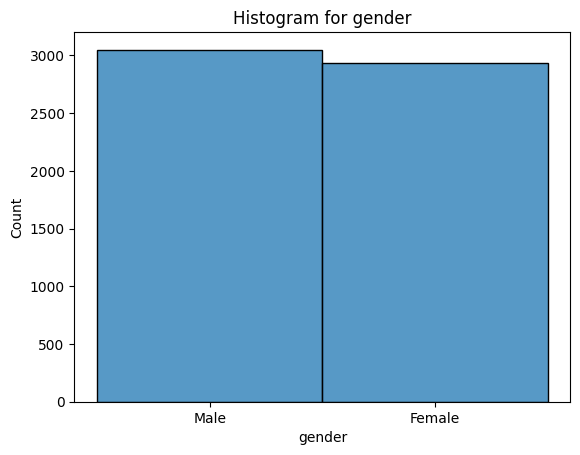

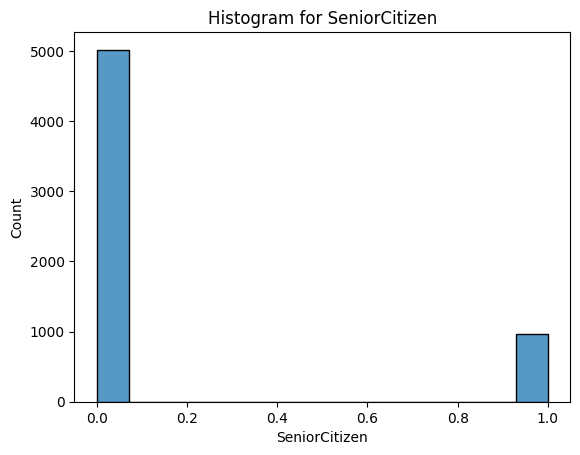

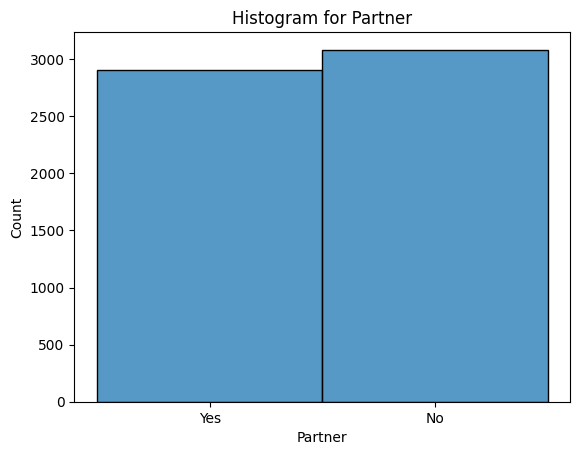

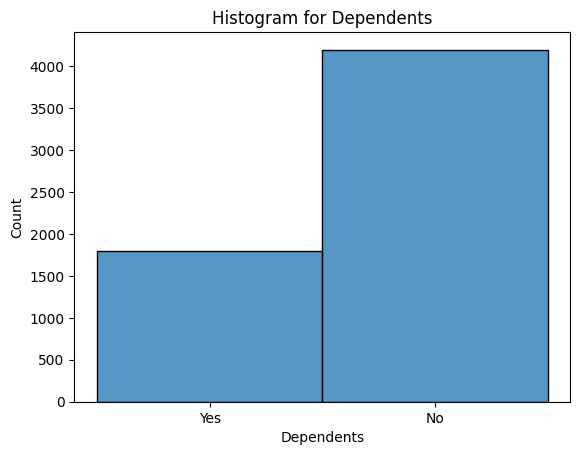

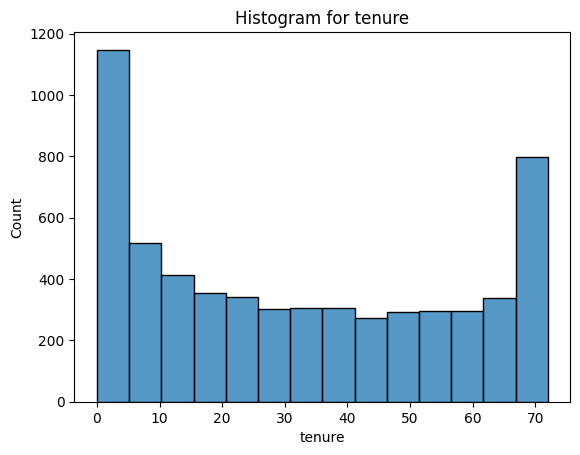

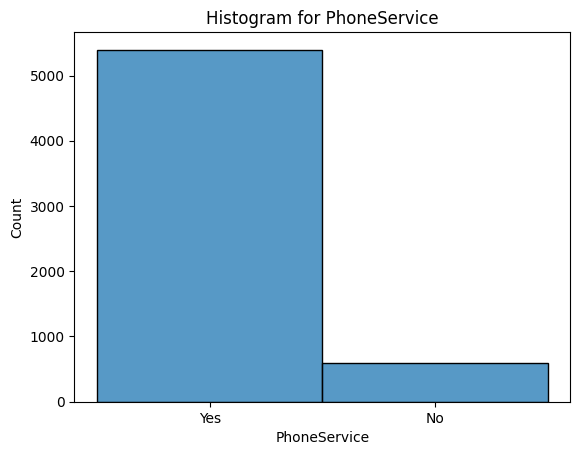

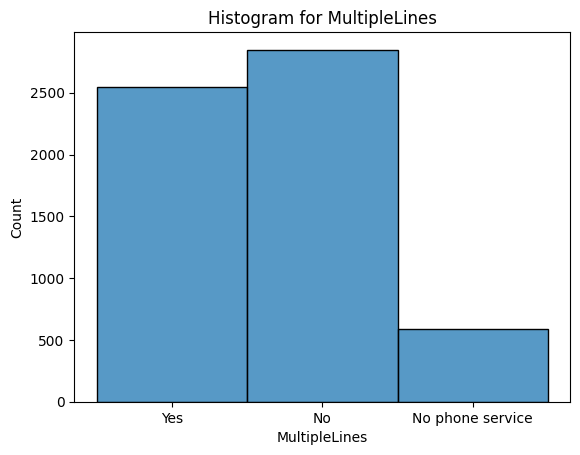

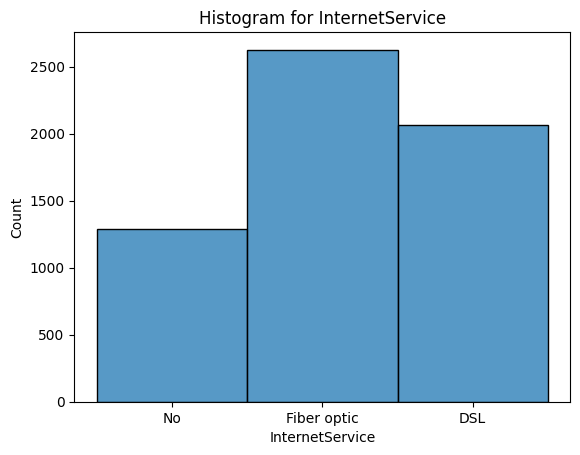

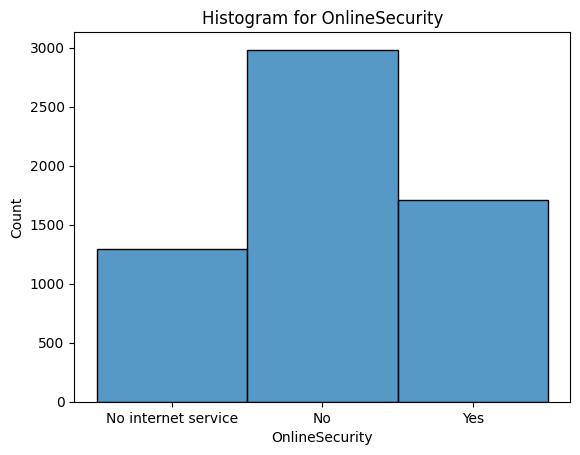

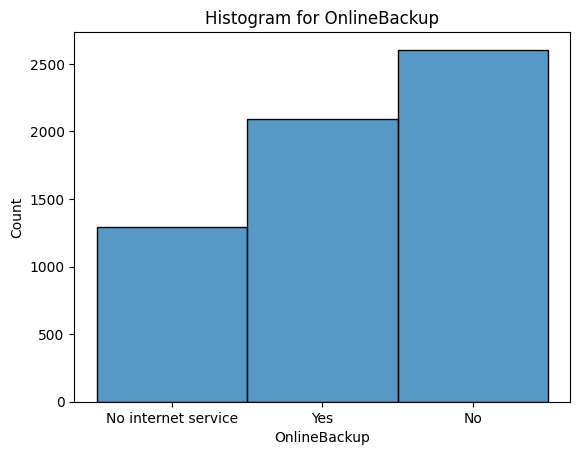

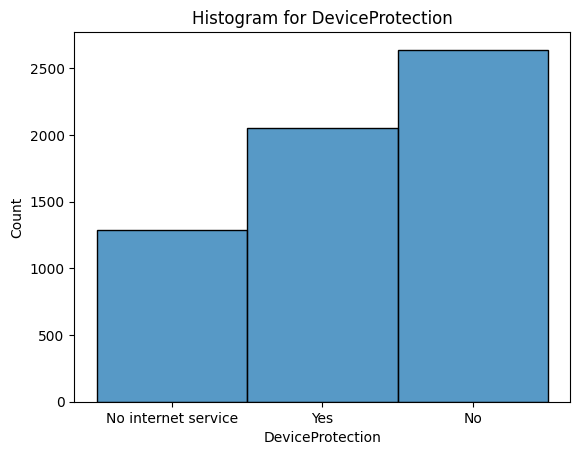

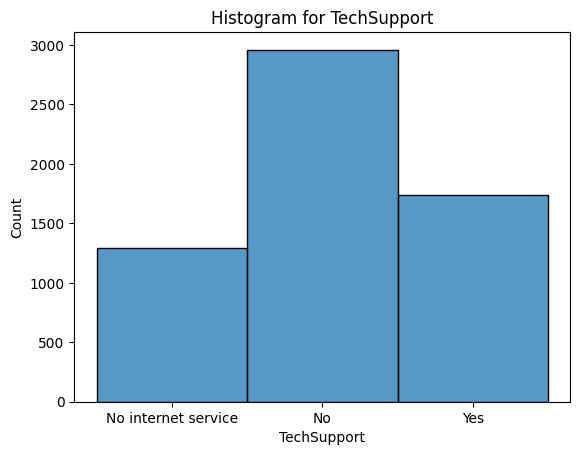

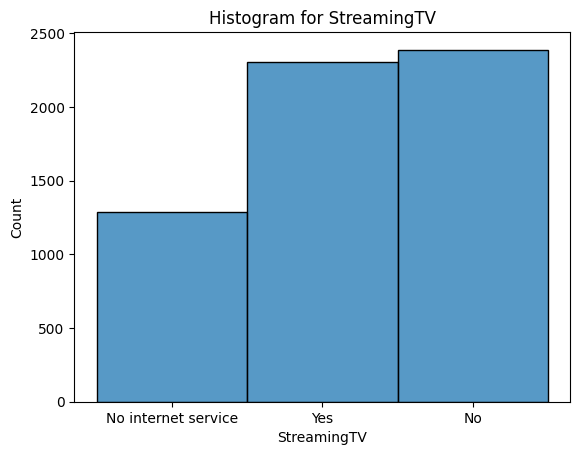

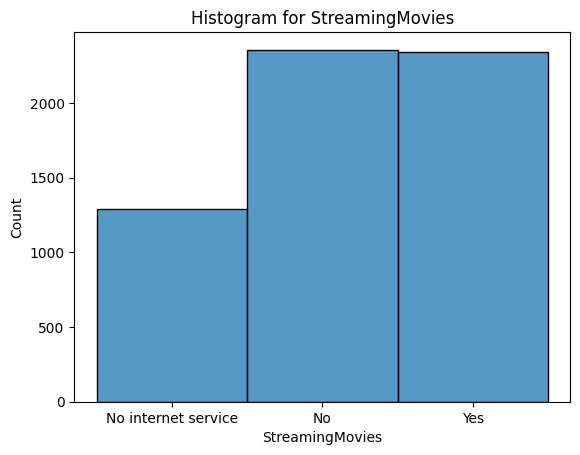

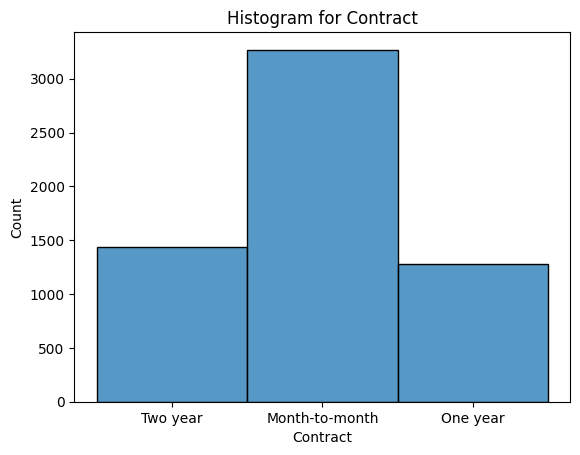

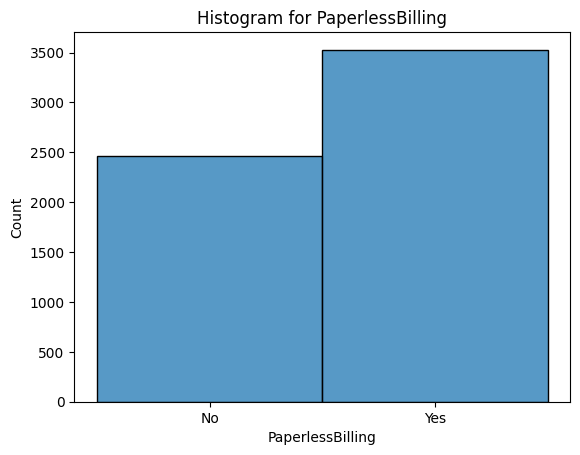

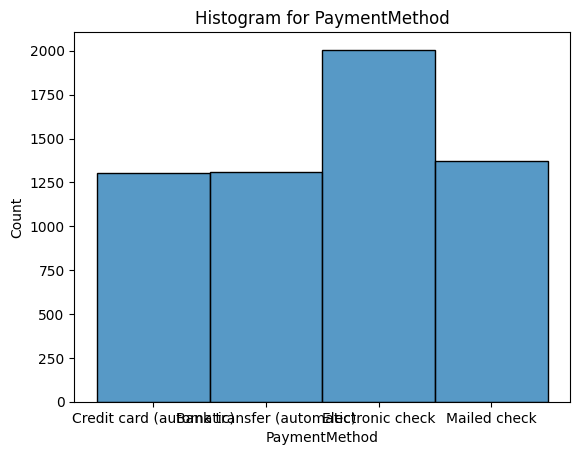

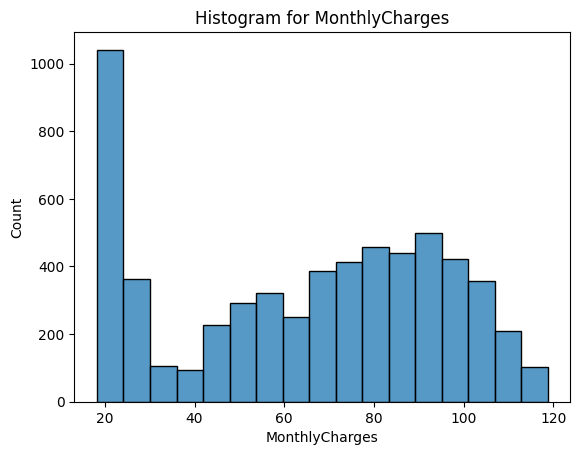

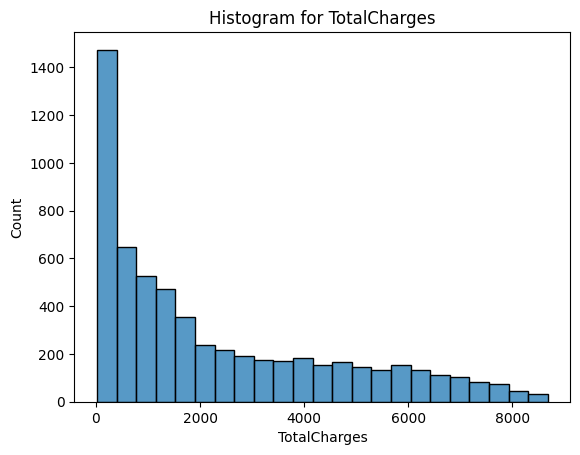

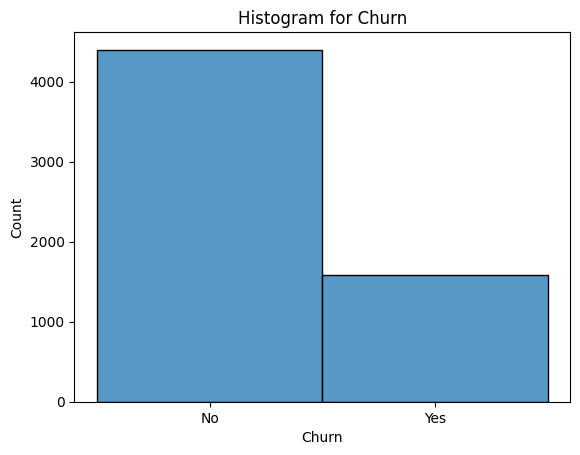

In [33]:
# Assuming dta_df is your DataFrame
# Create a histogram for each column
for column in data_df.drop(columns=['customerID', 'Unnamed: 0']).columns:
    sns.histplot(data_df[column],)
    plt.title(f'Histogram for {column}')
    plt.show()

In [16]:
data_df['Churn'].value_counts(normalize=True)

No     0.734881
Yes    0.265119
Name: Churn, dtype: float64

In [31]:
data_df['TotalCharges'] = pd.to_numeric(data_df['TotalCharges'], errors='coerce')

In [32]:
data_df.isnull().sum()

Unnamed: 0           0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

<ipython-input-37-faa6821cfa11>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data_df.drop(columns='Unnamed: 0').corr()


<Axes: >

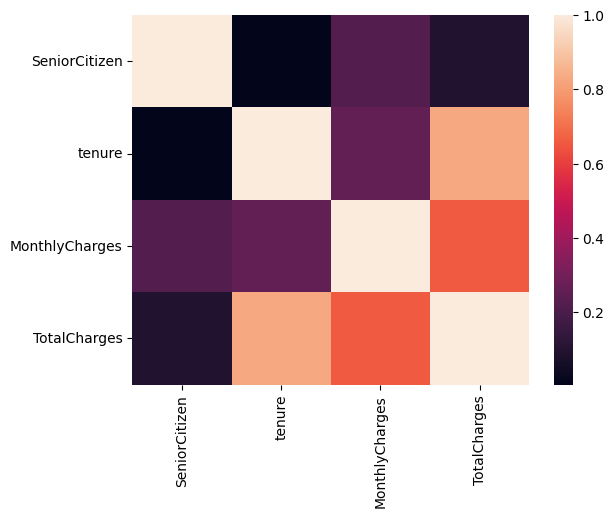

In [37]:
correlation = data_df.drop(columns='Unnamed: 0').corr()
sns.heatmap(correlation)

In [49]:
df_no_missing = data_df.dropna(subset=['TotalCharges'])
df_no_missing.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [50]:
X = df_no_missing.drop(columns = ['Unnamed: 0', 'customerID', 'Churn'])
y = df_no_missing['Churn']

In [63]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4183, 19), (1793, 19), (4183,), (1793,))

In [61]:
from pycaret.classification import *

In [96]:
clf = setup(data=pd.concat([X_train, y_train], axis=1),
            target = 'Churn',
            session_id=42,
            #normalize=True,
            test_data=pd.concat([X_test, y_test], axis=1),
            experiment_name='Test_1',
            n_jobs=-1)

,Description,Value
0,Session id,42
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(5976, 20)"
5,Transformed data shape,"(5976, 41)"
6,Transformed train set shape,"(4183, 41)"
7,Transformed test set shape,"(1793, 41)"
8,Ordinal features,5
9,Numeric features,4


In [70]:
X_train_transformed = get_config('X_train_transformed')
X_train_transformed

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines_Yes,MultipleLines_No phone service,MultipleLines_No,InternetService_Fiber optic,...,Contract_Month-to-month,Contract_Two year,Contract_One year,PaperlessBilling,PaymentMethod_Electronic check,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),MonthlyCharges,TotalCharges
5100,-1.009850,2.261746,1.036278,-0.646875,-1.035162,0.337172,1.172755,-0.337172,-0.954878,1.138898,...,0.906130,-0.558298,-0.520617,0.823754,1.407646,-0.528769,-0.554245,-0.517277,0.666458,-0.721640
1993,-1.009850,-0.442136,1.036278,1.545894,1.407785,-2.965848,-0.852693,2.965848,-0.954878,-0.878041,...,-1.103595,1.791159,-0.520617,-1.213954,-0.710406,1.891187,-0.554245,-0.517277,-0.344285,0.592161
3389,0.990246,-0.442136,-0.964992,-0.646875,0.878480,0.337172,-0.852693,-0.337172,1.047254,1.138898,...,-1.103595,-0.558298,1.920797,-1.213954,1.407646,-0.528769,-0.554245,-0.517277,0.661462,0.971724
2863,0.990246,-0.442136,-0.964992,-0.646875,-0.913015,0.337172,-0.852693,-0.337172,1.047254,1.138898,...,0.906130,-0.558298,-0.520617,0.823754,1.407646,-0.528769,-0.554245,-0.517277,1.517346,-0.546685
3302,0.990246,-0.442136,-0.964992,-0.646875,-0.180131,0.337172,1.172755,-0.337172,-0.954878,1.138898,...,0.906130,-0.558298,-0.520617,0.823754,-0.710406,1.891187,-0.554245,-0.517277,0.997821,0.166503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5244,0.990246,-0.442136,-0.964992,-0.646875,-0.424425,0.337172,-0.852693,-0.337172,1.047254,-0.878041,...,-1.103595,-0.558298,1.920797,-1.213954,-0.710406,1.891187,-0.554245,-0.517277,-1.473253,-0.800942
4305,0.990246,2.261746,-0.964992,-0.646875,-0.017267,0.337172,1.172755,-0.337172,-0.954878,1.138898,...,0.906130,-0.558298,-0.520617,0.823754,-0.710406,1.891187,-0.554245,-0.517277,0.551563,0.148784
915,-1.009850,-0.442136,1.036278,-0.646875,0.023448,0.337172,-0.852693,-0.337172,1.047254,-0.878041,...,0.906130,-0.558298,-0.520617,-1.213954,-0.710406,-0.528769,1.804256,-0.517277,-1.481579,-0.711666
908,0.990246,-0.442136,1.036278,1.545894,-0.383710,0.337172,-0.852693,-0.337172,1.047254,1.138898,...,-1.103595,-0.558298,1.920797,-1.213954,-0.710406,-0.528769,1.804256,-0.517277,0.741389,-0.150617


In [72]:
Best_model = compare_models(fold=3, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8006,0.8380,0.8006,0.7913,0.7936,0.4567,0.4609,3.1067
ada,Ada Boost Classifier,0.7985,0.8401,0.7985,0.7885,0.7908,0.4480,0.4529,0.9867
lda,Linear Discriminant Analysis,0.7956,0.8323,0.7956,0.7879,0.7905,0.4518,0.4541,0.3833
ridge,Ridge Classifier,0.7980,0.0000,0.7980,0.7866,0.7881,0.4380,0.4454,0.3533
gbc,Gradient Boosting Classifier,0.7958,0.8378,0.7958,0.7847,0.7865,0.4346,0.4413,1.2733
lightgbm,Light Gradient Boosting Machine,0.7853,0.8195,0.7853,0.7753,0.7782,0.4169,0.4205,0.5567
rf,Random Forest Classifier,0.7803,0.8111,0.7803,0.7673,0.7701,0.3911,0.3972,0.8000
svm,SVM - Linear Kernel,0.7707,0.0000,0.7707,0.7638,0.7650,0.3870,0.3907,0.3867
xgboost,Extreme Gradient Boosting,0.7688,0.8014,0.7688,0.7595,0.7629,0.3793,0.3814,0.5033
knn,K Neighbors Classifier,0.7679,0.7378,0.7679,0.7519,0.7552,0.3490,0.3564,1.1933


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [91]:
categorical_features = list(X.drop(columns=['TotalCharges', 'MonthlyCharges', 'tenure']).columns)
categorical_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [93]:
clf = setup(data=pd.concat([X_train, y_train], axis=1),
            target = 'Churn',
            session_id=42,
            numeric_features=['TotalCharges', 'MonthlyCharges', 'tenure'],
            categorical_features=categorical_features,
            normalize=True,
            test_data=pd.concat([X_test, y_test], axis=1),
            experiment_name='Test_1',
            n_jobs=-1)

,Description,Value
0,Session id,42
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(5976, 20)"
5,Transformed data shape,"(5976, 41)"
6,Transformed train set shape,"(4183, 41)"
7,Transformed test set shape,"(1793, 41)"
8,Ordinal features,6
9,Numeric features,3


In [90]:
X_train_transformed = get_config('X_train_transformed')
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4183 entries, 5100 to 5070
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   4183 non-null   float64
 1   SeniorCitizen                            4183 non-null   float64
 2   Partner                                  4183 non-null   float64
 3   Dependents                               4183 non-null   float64
 4   tenure                                   4183 non-null   float64
 5   PhoneService                             4183 non-null   float64
 6   MultipleLines_Yes                        4183 non-null   float64
 7   MultipleLines_No phone service           4183 non-null   float64
 8   MultipleLines_No                         4183 non-null   float64
 9   InternetService_Fiber optic              4183 non-null   float64
 10  InternetService_DSL                      4183

In [ ]:
X_train_transformed = get_config('X_test_transformed')
X_train_transformed

In [95]:
Best_model = compare_models(fold=3, sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8021,0.8391,0.8021,0.7930,0.7952,0.4609,0.4650,1.6433
ada,Ada Boost Classifier,0.7985,0.8401,0.7985,0.7885,0.7908,0.4480,0.4529,1.0000
ridge,Ridge Classifier,0.7982,0.0000,0.7982,0.7869,0.7883,0.4385,0.4460,0.3733
gbc,Gradient Boosting Classifier,0.7958,0.8377,0.7958,0.7847,0.7865,0.4346,0.4413,0.9700
lda,Linear Discriminant Analysis,0.7956,0.8323,0.7956,0.7879,0.7905,0.4518,0.4541,0.4000
lightgbm,Light Gradient Boosting Machine,0.7839,0.8221,0.7839,0.7728,0.7757,0.4087,0.4132,0.8167
rf,Random Forest Classifier,0.7798,0.8114,0.7798,0.7668,0.7697,0.3901,0.3962,0.8100
xgboost,Extreme Gradient Boosting,0.7688,0.8014,0.7688,0.7595,0.7629,0.3793,0.3814,0.5067
et,Extra Trees Classifier,0.7636,0.7822,0.7636,0.7516,0.7556,0.3570,0.3601,0.8033
svm,SVM - Linear Kernel,0.7626,0.0000,0.7626,0.7626,0.7610,0.3864,0.3889,0.3900


Processing:   0%|          | 0/65 [00:00<?, ?it/s]